#**LSTM**                ** "SENTIMENT ANALYSIS"**







In [ ]:
pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = '/content/EcoPreprocessed.csv'

In [ ]:
df = pd.read_csv('/content/EcoPreprocessed.csv')

In [ ]:
df.head

<bound method NDFrame.head of       Unnamed: 0                                             review  polarity  \
0           3870                            able play youtube alexa    0.5000   
1             62  able recognize indian accent really well drop ...    0.2794   
2            487  absolute smart device amazon connect external ...    0.1827   
3           3204  absolutely amaze new member family control hom...    0.3682   
4           1265  absolutely amaze previously sceptical invest m...    0.2333   
...          ...                                                ...       ...   
4079         852  yo yo yo love go if want one smart speaker val...    0.4571   
4080        2163                                      youtube music    0.0000   
4081        2488  youtube support nahi kartasong recognise achha...    0.0000   
4082         651  yup proscontrols wipro light amazinglysony bra...    0.0000   
4083         868  zero integration capabilities fire tv devices ...   -0.3125  

In [ ]:
df.tail

<bound method NDFrame.tail of       Unnamed: 0                                             review  polarity  \
0           3870                            able play youtube alexa    0.5000   
1             62  able recognize indian accent really well drop ...    0.2794   
2            487  absolute smart device amazon connect external ...    0.1827   
3           3204  absolutely amaze new member family control hom...    0.3682   
4           1265  absolutely amaze previously sceptical invest m...    0.2333   
...          ...                                                ...       ...   
4079         852  yo yo yo love go if want one smart speaker val...    0.4571   
4080        2163                                      youtube music    0.0000   
4081        2488  youtube support nahi kartasong recognise achha...    0.0000   
4082         651  yup proscontrols wipro light amazinglysony bra...    0.0000   
4083         868  zero integration capabilities fire tv devices ...   -0.3125  

In [ ]:
X = list(df.review)
Y = df.division

In [ ]:
df.isnull().sum()

Unnamed: 0    0
review        0
polarity      0
division      0
dtype: int64

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
#Cleaning the data. It includes removing the special characters, 
# unnecessary symbols, and stop words. 

In [ ]:
def cleaning(df, stop_words):
  df['review'] = df['review'].apply(lambda x:' '.join(x.lower() for x in x.split()))

In [ ]:
# Replacing the special characters
df['review'] = df['review'].str.replace('[^ws]', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [ ]:
# Replacing the digits/numbers
df['review'] = df['review'].str.replace('d', '')

In [ ]:
# Removing stop words
nltk.download("stopwords")
stopwords = nltk.corpus.stopwords.words('english')
df['review'] = df['review'].apply(lambda x:' '.join(x for x in x.split() if x not in stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import re

In [ ]:
# removal of urls
my_string = """ /content/EcoPreprocessed.csv
"""
result = re.sub(r'/content/EcoPreprocessed.csv', '', my_string)
print(result)

In [ ]:
# removal of email ids
text = '/content/EcoPreprocessed.csv'
emails = re.findall(r"[a-z0-9\.\-+_]+@[a-z0-9\.\-+_]+\.[a-z]+", text)
print (emails)

[]


In [ ]:
import wordcloud
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

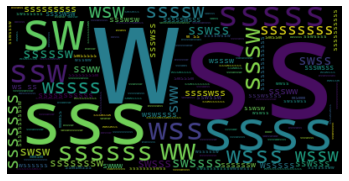

In [ ]:
common_words=''
for i in df.review:
  i = str(i)
  tokens = i.split()
  common_words += " ".join(tokens)+" "
wordcloud = wordcloud.WordCloud().generate(common_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
# pad seq function is used to convert a list of sequences into a 2D NumPy array.

In [ ]:
# Encoded the target column
lb=LabelEncoder()
df['division'] = lb.fit_transform(df['division'])

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ') 
tokenizer.fit_on_texts(df['review'].values)
X = tokenizer.texts_to_sequences(df['review'].values)
X = pad_sequences(X)

In [ ]:
print(X)

[[  0]
 [161]
 [162]
 ...
 [  2]
 [148]
 [ 10]]


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
#Building the LSTM model using the ‘Keras’ library
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.save('lstm_riya_model.h5')
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 120)            60000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 1, 120)           0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269,442
Trainable params: 269,442
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
from keras.models import load_model

In [ ]:
m = load_model('./lstm_riya_model.h5')
yhat = m.predict(X, verbose=0)
print(yhat)

[[0.49836412 0.5016358 ]
 [0.50228375 0.49771625]
 [0.5000461  0.49995393]
 ...
 [0.49853128 0.50146866]
 [0.5036692  0.49633077]
 [0.5000762  0.49992386]]


In [ ]:
#Splitting the data into training and testing
y=pd.get_dummies(df['division'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [ ]:
print(y)

      0  1  2
0     0  0  1
1     0  0  1
2     0  0  1
3     0  0  1
4     0  0  1
...  .. .. ..
4079  0  0  1
4080  0  1  0
4081  0  1  0
4082  0  1  0
4083  1  0  0

[4084 rows x 3 columns]
